In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 574


In [3]:
# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
        
    #Print error message and move to the next city
    except:
        print("City not found,Skipping...")
        

City Name: ushuaia, City ID: 3833367
City not found,Skipping...
City Name: nikolayevsk-on-amure, City ID: 2122850
City Name: port-aux-francais, City ID: 1546102
City Name: raymondville, City ID: 4721703
City Name: hermanus, City ID: 3366880
City Name: qaqortoq, City ID: 3420846
City not found,Skipping...
City Name: avarua, City ID: 4035715
City Name: papa, City ID: 3046686
City Name: acarau, City ID: 3408368
City Name: albany, City ID: 5106841
City Name: yellowknife, City ID: 6185377
City Name: lokhvytsya, City ID: 702874
City Name: chonchi, City ID: 3894871
City Name: blackmans bay, City ID: 2175527
City Name: college, City ID: 5859699
City Name: tame, City ID: 3667478
City Name: al hasaheisa, City ID: 379427
City Name: kodinsk, City ID: 1503037
City Name: mount pearl, City ID: 6082231
City Name: jamestown, City ID: 5122534
City Name: saipan, City ID: 4041552
City Name: stanley, City ID: 8224783
City Name: bovalino, City ID: 2525513
City Name: calabozo, City ID: 3647444
City Name: por

City Name: puerto armuelles, City ID: 3702431
City not found,Skipping...
City Name: mogocha, City ID: 2019912
City Name: ciudad lazaro cardenas, City ID: 4026082
City Name: remire-montjoly, City ID: 3380892
City Name: namdrik, City ID: 7306522
City Name: whitehorse, City ID: 6180550
City Name: rioja, City ID: 3848950
City Name: kibre mengist, City ID: 333103
City Name: cannonvale, City ID: 2172477
City Name: ust-nera, City ID: 2120048
City Name: och'amch'ire, City ID: 612652
City Name: tenenkou, City ID: 2449938
City not found,Skipping...
City Name: whangarei, City ID: 6230919
City Name: haparanda, City ID: 605859
City Name: gao, City ID: 2457161
City Name: dunedin, City ID: 2191562
City not found,Skipping...
City Name: morant bay, City ID: 3489440
City Name: key west, City ID: 4160812
City Name: lazaro cardenas, City ID: 4026082
City Name: ploermel, City ID: 2986729
City Name: altagracia de orituco, City ID: 3649408
City Name: timimoun, City ID: 2476403
City Name: sungai penuh, City I

City Name: richlands, City ID: 4781711
City Name: ves'yegonsk, City ID: 473943
City Name: pisco, City ID: 3932145
City Name: ploudalmezeau, City ID: 6453932
City not found,Skipping...
City Name: sinop, City ID: 739598
City Name: margate, City ID: 2643044
City Name: woodland, City ID: 5410430
City Name: mana, City ID: 3381041
City Name: caluula, City ID: 63081
City Name: kargopol', City ID: 552465
City Name: isangel, City ID: 2136825
City Name: trincomalee, City ID: 1226260
City Name: richards bay, City ID: 962367
City Name: sandnessjoen, City ID: 3140301
City Name: fecamp, City ID: 3018794
City Name: suoyarvi, City ID: 486186
City Name: baki, City ID: 1650670
City Name: constitucion, City ID: 3893726
City Name: calvinia, City ID: 3369174
City Name: langon, City ID: 3007688
City not found,Skipping...
City Name: lodja, City ID: 211647
City Name: elizabethtown, City ID: 4290988
City Name: beni saf, City ID: 2504581
City Name: sault ste. marie, City ID: 6141439
City Name: bandar-e genaveh,

In [6]:
# Convert the cities weather data into a Pandas DataFrame
cities_df = pd.DataFrame({"City ID": city_id_list, "City" : city_name_list, "Country": country_list,
                         "Lat": lat_list, "Lng": lng_list, "Temperature" : temp_list,
                         "Humidity" : humidity_list, "Clouds": clouds_list, "Wind Speed": wind_speed_list})

# Show record count
cities_df.count()

City ID        548
City           548
Country        548
Lat            548
Lng            548
Temperature    548
Humidity       548
Clouds         548
Wind Speed     548
dtype: int64

In [7]:
#Display Sample Data
cities_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,3833367,Ushuaia,AR,-54.8000,-68.3000,31.66,93,100,4.61
1,2122850,Nikolayevsk-on-Amur,RU,53.1406,140.7300,62.73,96,94,2.44
2,1546102,Port-aux-Français,TF,-49.3500,70.2167,34.61,69,89,39.24
3,4721703,Raymondville,US,26.4815,-97.7831,99.23,28,40,17.52
4,3366880,Hermanus,ZA,-34.4187,19.2345,50.81,77,0,12.80


In [8]:
#Export to .csv file
cities_df.to_csv("Output/city_weather.csv", index = False, header = True)

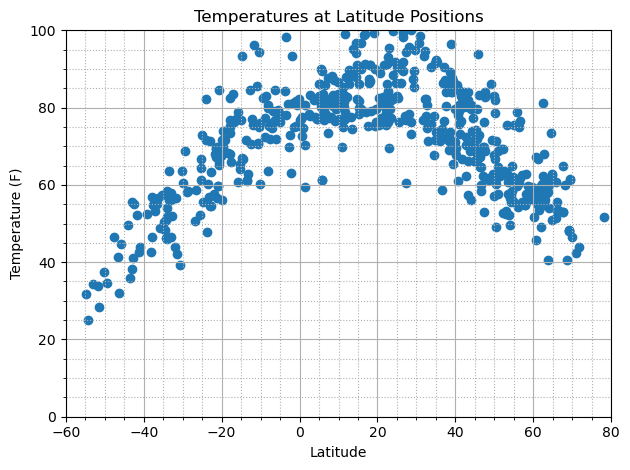

In [9]:
# CREATE THE SCATTER PLOTS REQUESTED
#Latitude Vs. Temperature

# Build scatter plot for latitude vs. temperature
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

# Save the figure
plt.savefig("Images/lat_temp.png")

# Show plot
plt.show()

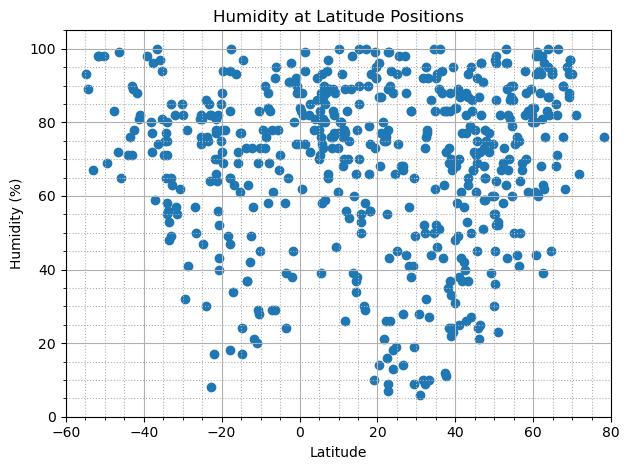

In [10]:
#Latitude Vs. Humidity

# Build the scatter plots for latitude vs. humidity
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

# Save the figure
plt.savefig("Images/lat_humid.png")

# Show plot
plt.show()

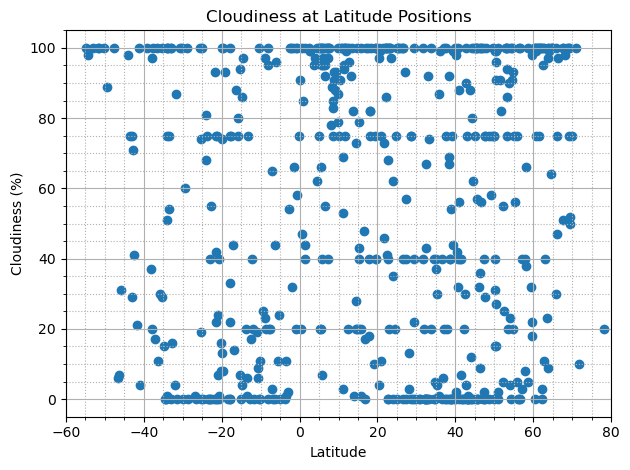

In [11]:
#Latitude Vs. Cloudiness

# Build the scatter plots for latitude vs. humidity
x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

# Save the figure
plt.savefig("Images/lat_cloud.png")

# Show plot
plt.show()

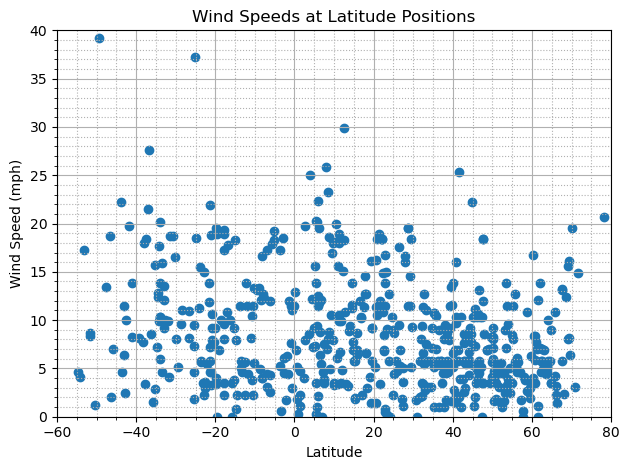

In [12]:
#Latitude Vs. Wind Speed Plot

# Build the scatter plots for latitude vs. humidity
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.title('Wind Speeds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

# Save the figure
plt.savefig("Images/lat_wind.png")

# Show plot
plt.show()

In [13]:
#REQUIREMENT 2: COMPUTE LINEAR REGRESSION FOR EACH RELATIONSHIP

#Create a function to create Linear Regression plots

def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value, y_values)
    regress_values = x_values * slope + intercept
    
    line_eq = "y= "+ str(round(slope,2)) + "x + " + str(round(intercept,2))
    correlation = st.pearsonr(x_values, y_values)
    
    print(f"r-squared: {rvalue**2}")
    print(f"Correlation : {correlation}")
    print(f"Line : {line_eq}")
   
    return regress_values, line_eq

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
mask = cities_df['Lat'] >0

northern_hemisphere = cities_df[mask]

# Display sample data
northern_hemisphere.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
1,2122850,Nikolayevsk-on-Amur,RU,53.1406,140.7300,62.73,96,94,2.44
3,4721703,Raymondville,US,26.4815,-97.7831,99.23,28,40,17.52
5,3420846,Qaqortoq,GL,60.7167,-46.0333,45.68,93,100,5.86
7,3046686,Pápa,HU,47.3300,17.4674,69.73,73,0,0.00
9,5106841,Albany,US,42.6001,-73.9662,83.89,40,30,3.87


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
mask = cities_df['Lat'] < 0

southern_hemisphere = cities_df[mask]

# Display sample data
southern_hemisphere.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,3833367,Ushuaia,AR,-54.8000,-68.3000,31.66,93,100,4.61
2,1546102,Port-aux-Français,TF,-49.3500,70.2167,34.61,69,89,39.24
4,3366880,Hermanus,ZA,-34.4187,19.2345,50.81,77,0,12.80
6,4035715,Avarua,CK,-21.2078,-159.7750,69.85,64,75,4.61
8,3408368,Acaraú,BR,-2.8856,-40.1200,81.05,65,2,18.52


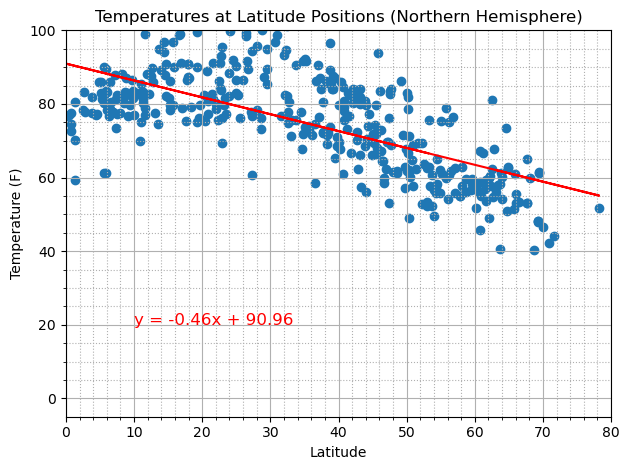

In [19]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature"]



(slope, intercept, rvalue, pvalue, strderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = "+ str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values,y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.savefig("Images/nh_lat_temp_regression.png")

plt.show()

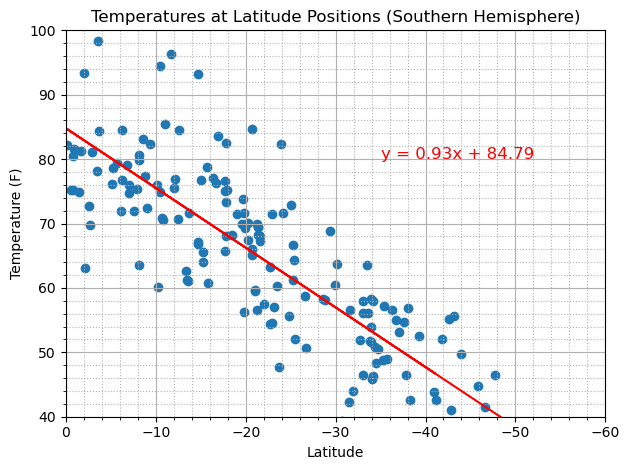

In [18]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

plt.savefig("Images/sh_lat_temp_regression.png")
plt.show()

In [35]:
# Discussion about the linear Relationship:

#Answer

Max Temp vs. Latitude Linear Regression

Both the Northern and Southern Hemispheres show the same inverse relationship between latitude
and temperature. As you get closer to the equator (latitude 0) the higher the temperature gets. 
There is a strong correlation for both hemishperes, but the Northern Hemisphere seems to have an almost one to one relationship.

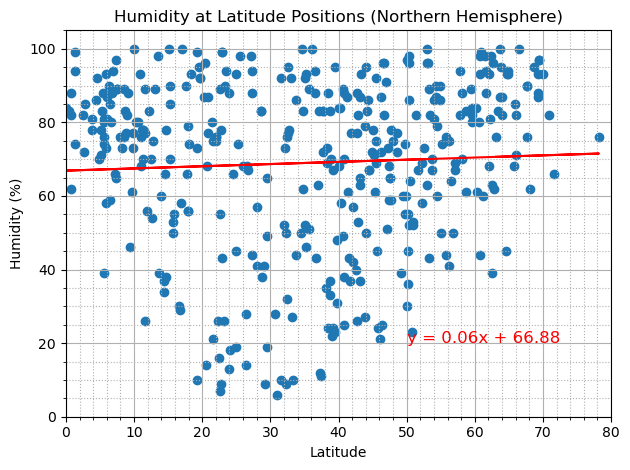

In [20]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

plt.savefig("Images/nh_lat_humid_regression.png")
plt.show()

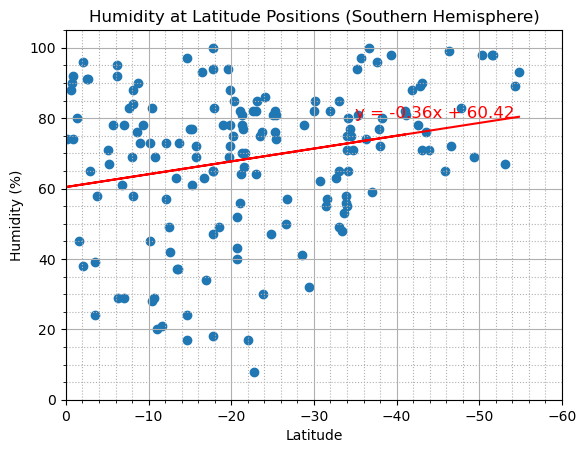

In [21]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()

plt.savefig("Images/sh_lat_humid_regression.png")
plt.show()

In [ ]:
# Discussion about the linear relationship:Humidity % vs. Latitude Linear Regression

#Answer

There does not seem to be a very strong correlation between humidity and latitude. 
However, there does seem to be a slight positive correlation in the Northern Hemisphere 
and a slight negative correlation in the Southern Hemisphere; meaning in the Northern Hemisphere 
as you get further away from the equator (latitude 0) humidity increases, and in the Southern Hemisphere it decreases 
as you get further away from the equator.

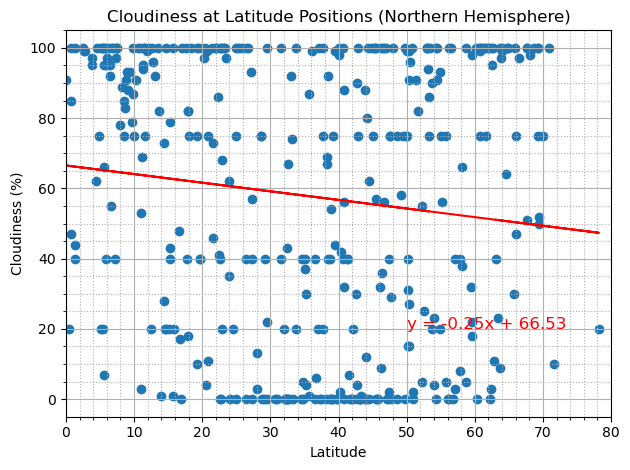

In [22]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

plt.savefig("Images/nh_lat_clouds_regression.png")
plt.show()

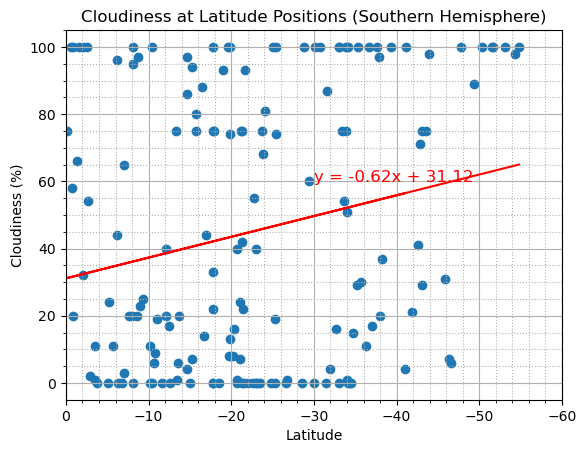

In [23]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()

plt.savefig("Images/sh_lat_clouds_regression.png")
plt.show()

In [ ]:
# Discussion about the linear relationship: Cloudiness vs. Latitude Linear Regression

#Answer

There does not seem to be much correlation between cloudiness and latitude when you look at the plots.
However, when the linear regression is performed, you can see that there is a slight positive correlation 
in the Northern Hemisphere but a strong negative correlation in the Southern Hemisphere.
In the Southern Hemisphere it shows that the further you are from the equator (latitude 0) the less cloudy it is.

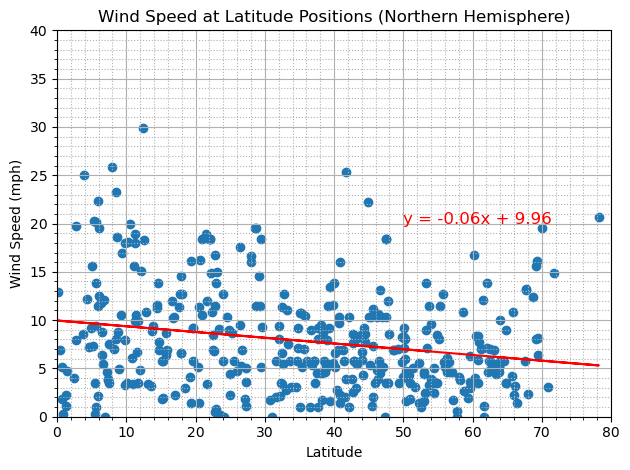

In [24]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()

plt.savefig("Images/nh_lat_wind_regression.png")
plt.show()

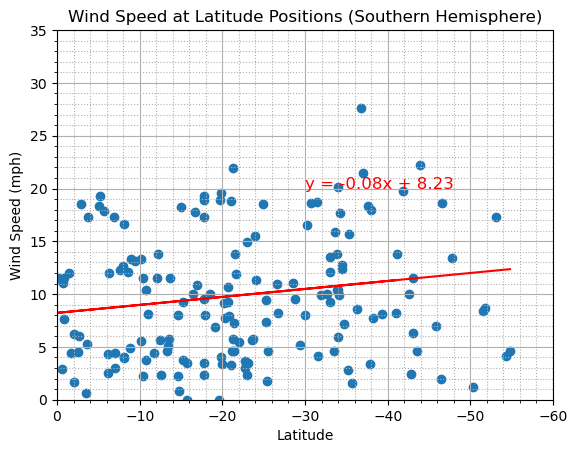

In [25]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()

plt.savefig("Images/sh_lat_wind_regression.png")
plt.show()

In [ ]:
# Discussion about the linear relationship: Wind Speed vs. Latitude Linear Regression

There does seem to be a pretty strong correlation between wind sped and latitude when you look at the plots. 
However, the linear regresion shows a much lower correlation than it appears. There is still a definite correlation 
in both hemispheres, in that the further you are from the equator (latitude 0) the higher the wind speeds are, 
but the slope of the regression line is much shallower than I was expecting looking at the plots.